In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("CesDataClean.csv")

# List of variables to keep
vars_to_keep = [
    "cons_tot_wave10", "cons_tot_wave13",
    "treat1", "treat2", "treat3", "treat4", "treat5",
    "egrea_imean_bt", "egrea_istd_bt", "lhhnetinc",
    "cnt1", "cnt2", "cnt3", "cnt4", "cnt5", "cnt6",
    "hhsize", "male", "dedu2", "dedu3", "age",
    "liquid_wave9", 'sh_sav_wave9',
    'sh_stock_wave9',
    'sh_mutf_wave9',
    'sh_ira_wave9',
    'sh_bond_wave9',
    'sh_oth_wave9'
]

# Keep only those variables (dropping others)
df_subset = df[vars_to_keep]

# Save to a new CSV
df_subset.to_csv("CesDataClean4_subset.csv", index=False)

print("Subset saved as CesDataClean3_subset.csv")
print(df_subset.head())

Subset saved as CesDataClean3_subset.csv
   cons_tot_wave10  cons_tot_wave13  treat1  treat2  treat3  treat4  treat5  \
0              NaN              NaN     NaN     NaN     NaN     NaN     NaN   
1           1082.0           1310.0     1.0     0.0     0.0     0.0     0.0   
2           3650.0           3250.0     1.0     0.0     0.0     0.0     0.0   
3           2680.0           2215.0     1.0     0.0     0.0     0.0     0.0   
4           3415.0           3741.0     0.0     0.0     0.0     1.0     0.0   

   egrea_imean_bt  egrea_istd_bt  lhhnetinc  ...  dedu2  dedu3  age  \
0             NaN            NaN        NaN  ...    NaN    NaN  Age   
1            -4.5       1.428869   9.546813  ...    0.0    1.0   54   
2            14.0       1.224745  10.714418  ...    1.0    0.0   42   
3             0.0       2.041241  11.225243  ...    0.0    1.0   54   
4            -4.0       0.408248  11.289782  ...    0.0    1.0   54   

   liquid_wave9  sh_sav_wave9  sh_stock_wave9  sh_mutf_wa

C:\Users\Zach\AppData\Local\Temp\ipykernel_64192\3328995432.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,651,652,653,654,655,656,657,658,659,660,672,683,697,698,699,705,706,707) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CesDataCle

In [18]:
import pandas as pd
import statsmodels.api as sm

# Load subset dataset
df = pd.read_csv("CesDataClean3_subset.csv")

# Define predictors (exclude cons_tot_wave10 & cons_tot_wave13 accordingly)
predictors_wave10 = [col for col in df.columns if col not in ["cons_tot_wave10", "cons_tot_wave13"]]
predictors_wave13 = [col for col in df.columns if col not in ["cons_tot_wave10", "cons_tot_wave13"]]

# Add constant for intercept
X1 = sm.add_constant(df[predictors_wave10])
y1 = df["cons_tot_wave10"]

X2 = sm.add_constant(df[predictors_wave13])
y2 = df["cons_tot_wave13"]

# Run OLS regressions
model1 = sm.OLS(y1, X1).fit()
model2 = sm.OLS(y2, X2).fit()

# Print summaries
print("=== Regression 1: cons_tot_wave10 ===")
print(model1.summary())

print("\n=== Regression 2: cons_tot_wave13 ===")
print(model2.summary())

=== Regression 1: cons_tot_wave10 ===
                            OLS Regression Results                            
Dep. Variable:        cons_tot_wave10   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.149
Date:                Tue, 30 Sep 2025   Prob (F-statistic):            0.00328
Time:                        16:08:03   Log-Likelihood:                -34804.
No. Observations:                3309   AIC:                         6.965e+04
Df Residuals:                    3290   BIC:                         6.976e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const 

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric where possible
df = df.apply(pd.to_numeric, errors="coerce")

# Drop rows with missing or non-positive consumption (log requires >0)
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Define predictors
predictors = [col for col in df.columns if col not in ["cons_tot_wave10", "cons_tot_wave13"]]

# Prepare dependent variables (log)
y1 = np.log(df["cons_tot_wave10"].astype(float))
y2 = np.log(df["cons_tot_wave13"].astype(float))

# Build models
X = sm.add_constant(df[predictors].astype(float))

model1 = sm.OLS(y1, X).fit()
model2 = sm.OLS(y2, X).fit()

# Print results
print("=== Regression 1: log(cons_tot_wave10)===")
print(model1.summary())

print("\n=== Regression 2: log(cons_tot_wave13)===")
print(model2.summary())


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\3645681914.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


=== Regression 1: log(cons_tot_wave10)===
                            OLS Regression Results                            
Dep. Variable:        cons_tot_wave10   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     39.86
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          2.09e-126
Time:                        16:08:17   Log-Likelihood:                -2876.7
No. Observations:                3285   AIC:                             5791.
Df Residuals:                    3266   BIC:                             5907.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
co

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric where possible
df = df.apply(pd.to_numeric, errors="coerce")

# Drop rows with missing or non-positive consumption (log requires >0)
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Explicitly drop treat5
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Define predictors (drop treat1 so it's the baseline)
predictors = [col for col in df.columns if col not in ["cons_tot_wave10", "cons_tot_wave13", "treat1"]]

# Prepare dependent variables (log * 100)
y1 = 100 * np.log(df["cons_tot_wave10"].astype(float))
y2 = 100 * np.log(df["cons_tot_wave13"].astype(float))

# Build models
X = sm.add_constant(df[predictors].astype(float))

model1 = sm.OLS(y1, X).fit()
model2 = sm.OLS(y2, X).fit()

# Print results
print("=== Regression 1: log(cons_tot_wave10)*100 ===")
print(model1.summary())

print("\n=== Regression 2: log(cons_tot_wave13)*100 ===")
print(model2.summary())


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\3648003977.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


=== Regression 1: log(cons_tot_wave10)*100 ===
                            OLS Regression Results                            
Dep. Variable:        cons_tot_wave10   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     42.08
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          8.27e-127
Time:                        16:08:26   Log-Likelihood:                -18006.
No. Observations:                3285   AIC:                         3.605e+04
Df Residuals:                    3267   BIC:                         3.616e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

C:\Users\Zach\AppData\Local\Temp\ipykernel_36496\3269990006.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


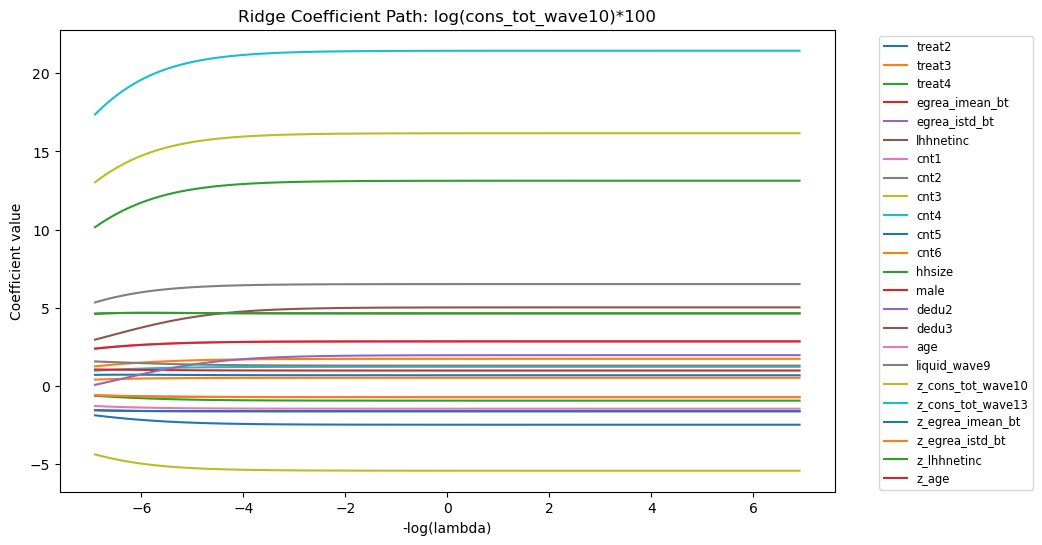

TypeError: _BaseRidgeCV.__init__() got an unexpected keyword argument 'store_cv_values'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler

# Load the subset dataset
df = pd.read_csv("CesDataClean3_subset_standardized2.csv")

# Convert boolean to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only rows with positive consumption
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5, and treat1 (baseline)
drop_vars = ["cons_tot_wave10", "cons_tot_wave13", "treat1", "treat5"]
X = df.drop(columns=[c for c in drop_vars if c in df.columns])
y1 = 100 * np.log(df["cons_tot_wave10"].astype(float))
y2 = 100 * np.log(df["cons_tot_wave13"].astype(float))

# Standardize predictors but keep column names
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

alphas = np.logspace(-3, 3, 100)

def ridge_path_and_cv(X, y, label):
    # Ridge coefficient paths
    coefs = []
    for a in alphas:
        ridge = Ridge(alpha=a, fit_intercept=True)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)
    coefs = np.array(coefs)

    # Plot coefficient path
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(X.columns):
        plt.plot(-np.log(alphas), coefs[:, i], label=col)
    plt.xlabel("-log(lambda)")
    plt.ylabel("Coefficient value")
    plt.title(f"Ridge Coefficient Path: {label}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
    plt.show()

    # RidgeCV
    ridgecv = RidgeCV(alphas=alphas, store_cv_values=True)
    ridgecv.fit(X, y)

    # Plot CV curve
    mean_mse = ridgecv.cv_values_.mean(axis=0)
    plt.figure(figsize=(8, 6))
    plt.plot(-np.log(alphas), mean_mse, marker="o", label=f"{label}")
    plt.axvline(-np.log(ridgecv.alpha_), linestyle="--", color="red", label=f"Best λ={ridgecv.alpha_:.3f}")
    plt.xlabel("-log(lambda)")
    plt.ylabel("Mean Squared Error (CV)")
    plt.title(f"Ridge CV Curve: {label}")
    plt.legend()
    plt.show()

# Run for both outcomes
ridge_path_and_cv(X_scaled, y1, "log(cons_tot_wave10)*100")
ridge_path_and_cv(X_scaled, y2, "log(cons_tot_wave13)*100")


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\401825994.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.586e+03, tolerance: 1.352e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.587e+03, tolerance: 1.352e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\skl

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+03, tolerance: 1.352e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.628e+03, tolerance: 1.352e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.633e+03, tolerance: 

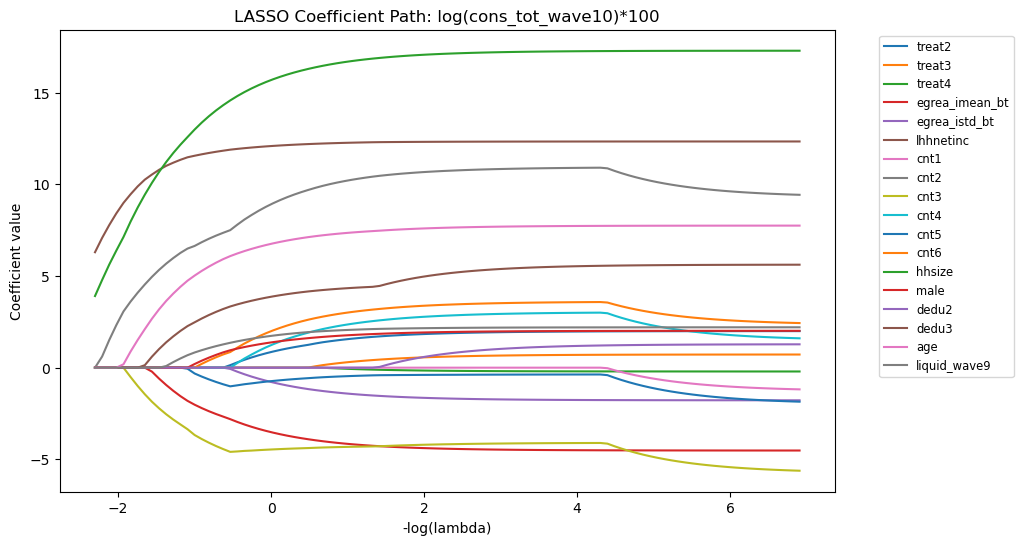

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.586e+03, tolerance: 1.352e+03
  model = cd_fast.enet_coordinate_descent(


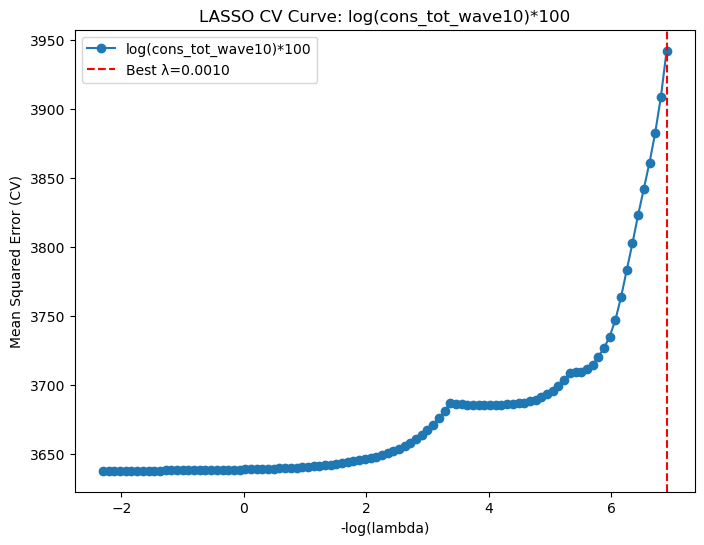

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.866e+03, tolerance: 1.457e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e+03, tolerance: 1.457e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e+03, tolerance: 

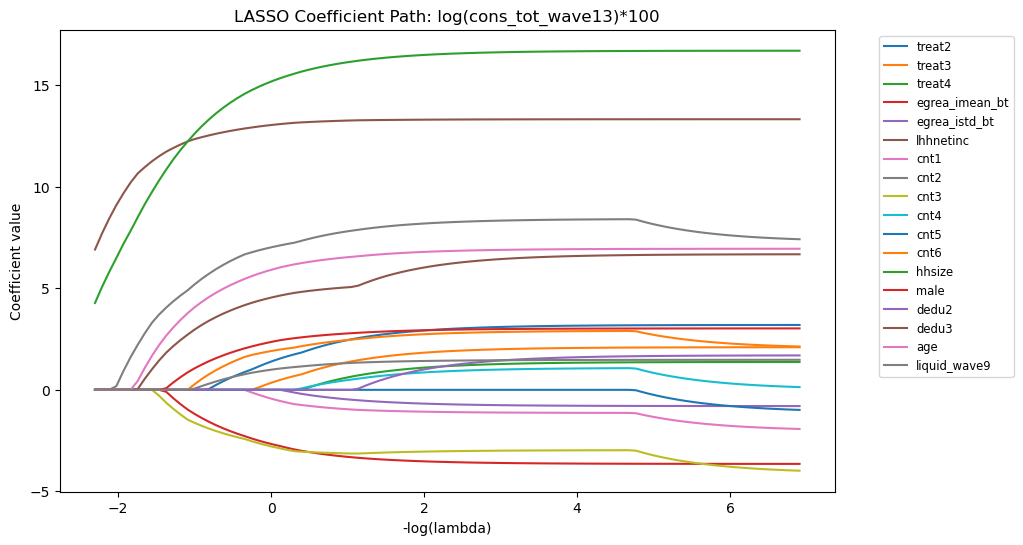

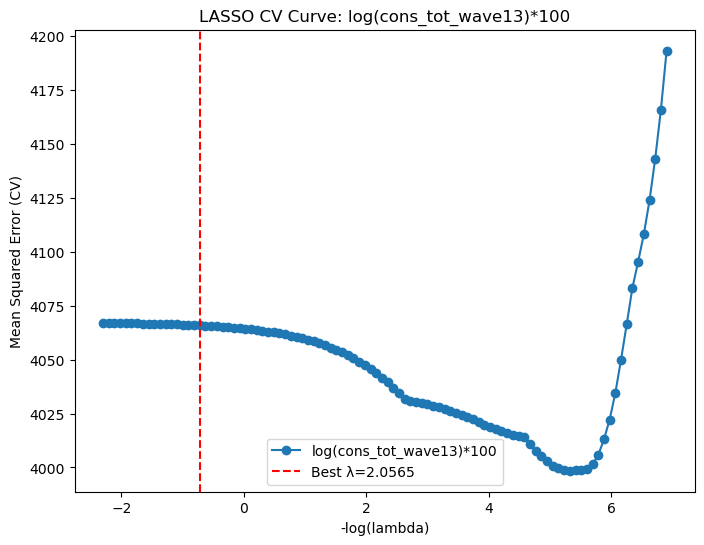

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

# Load the subset dataset
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert boolean to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only rows with positive consumption
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5, and treat1 (baseline)
drop_vars = ["cons_tot_wave10", "cons_tot_wave13", "treat1", "treat5"]
X = df.drop(columns=[c for c in drop_vars if c in df.columns])
y1 = 100 * np.log(df["cons_tot_wave10"].astype(float))
y2 = 100 * np.log(df["cons_tot_wave13"].astype(float))

# Standardize predictors but keep column names
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

alphas = np.logspace(-3, 1, 100)  # LASSO usually works better on smaller alphas

def lasso_path_and_cv(X, y, label):
    # LASSO coefficient paths
    coefs = []
    for a in alphas:
        lasso = Lasso(alpha=a, fit_intercept=True, max_iter=5000)
        lasso.fit(X, y)
        coefs.append(lasso.coef_)
    coefs = np.array(coefs)

    # Plot coefficient path
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(X.columns):
        plt.plot(-np.log(alphas), coefs[:, i], label=col)
    plt.xlabel("-log(lambda)")
    plt.ylabel("Coefficient value")
    plt.title(f"LASSO Coefficient Path: {label}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
    plt.show()

    # LASSO CV
    lassocv = LassoCV(alphas=alphas, cv=5, max_iter=5000)
    lassocv.fit(X, y)

    # Plot CV curve
    mse_path = lassocv.mse_path_.mean(axis=1)
    plt.figure(figsize=(8, 6))
    plt.plot(-np.log(alphas), mse_path, marker="o", label=f"{label}")
    plt.axvline(-np.log(lassocv.alpha_), linestyle="--", color="red", label=f"Best λ={lassocv.alpha_:.4f}")
    plt.xlabel("-log(lambda)")
    plt.ylabel("Mean Squared Error (CV)")
    plt.title(f"LASSO CV Curve: {label}")
    plt.legend()
    plt.show()

# Run for both outcomes
lasso_path_and_cv(X_scaled, y1, "log(cons_tot_wave10)*100")
lasso_path_and_cv(X_scaled, y2, "log(cons_tot_wave13)*100")


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\800529830.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


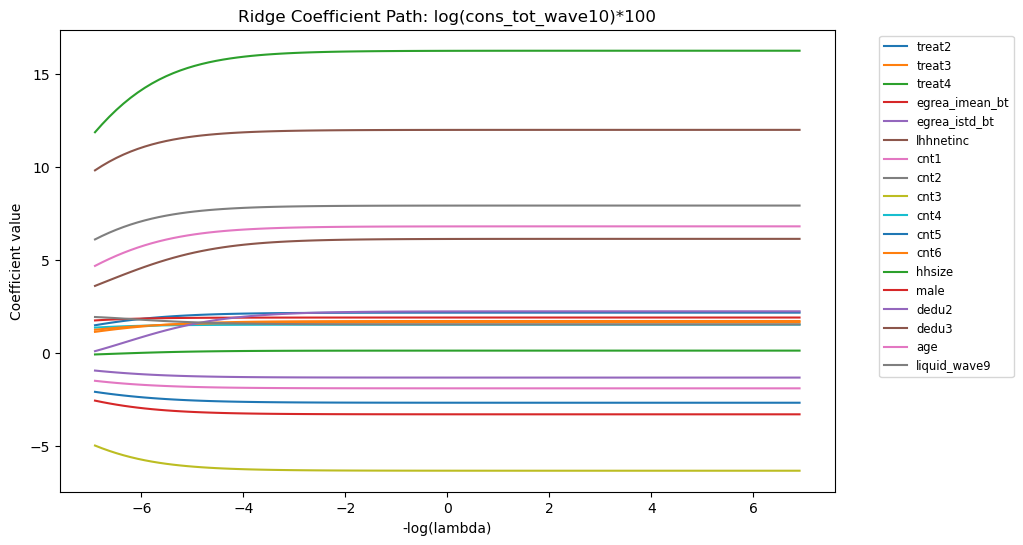

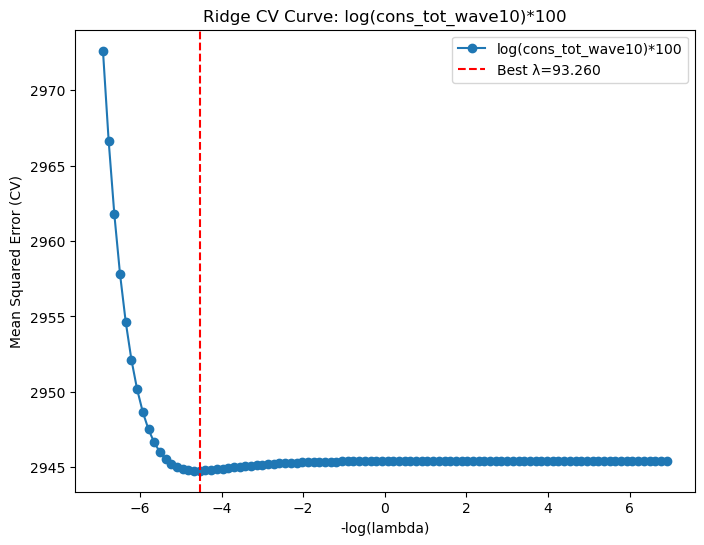

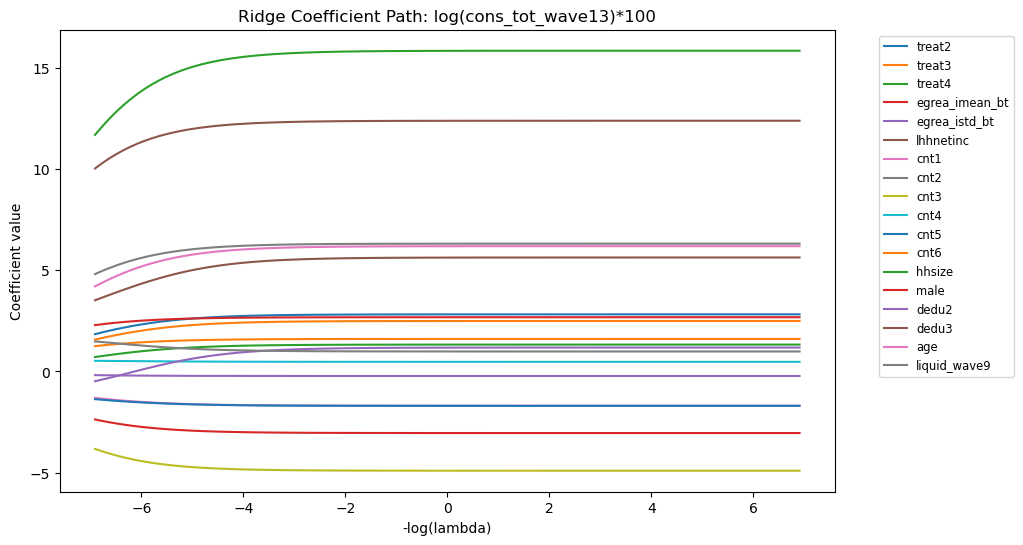

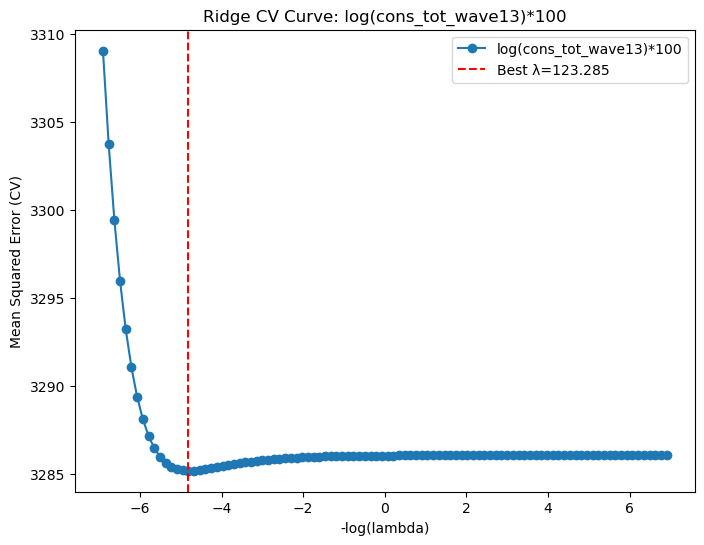

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler

# Load the subset dataset
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert boolean to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only rows with positive consumption
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5, and treat1 (baseline)
drop_vars = ["cons_tot_wave10", "cons_tot_wave13", "treat1", "treat5"]
X = df.drop(columns=[c for c in drop_vars if c in df.columns])

# Filter out observations where outcome > 10,000
df_filtered = df[(df["cons_tot_wave10"] <= 10000) & (df["cons_tot_wave13"] <= 10000)]

y1 = 100 * np.log(df_filtered["cons_tot_wave10"].astype(float))
y2 = 100 * np.log(df_filtered["cons_tot_wave13"].astype(float))

X_filtered = X.loc[df_filtered.index]  # Keep matching rows for X

# Standardize predictors but keep column names
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_filtered), columns=X_filtered.columns)

alphas = np.logspace(-3, 3, 100)

def ridge_path_and_cv(X, y, label):
    # Ridge coefficient paths
    coefs = []
    for a in alphas:
        ridge = Ridge(alpha=a, fit_intercept=True)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)
    coefs = np.array(coefs)

    # Plot coefficient path
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(X.columns):
        plt.plot(-np.log(alphas), coefs[:, i], label=col)
    plt.xlabel("-log(lambda)")
    plt.ylabel("Coefficient value")
    plt.title(f"Ridge Coefficient Path: {label}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
    plt.show()

    # RidgeCV
    ridgecv = RidgeCV(alphas=alphas, store_cv_values=True)
    ridgecv.fit(X, y)

    # Plot CV curve
    mean_mse = ridgecv.cv_values_.mean(axis=0)
    plt.figure(figsize=(8, 6))
    plt.plot(-np.log(alphas), mean_mse, marker="o", label=f"{label}")
    plt.axvline(-np.log(ridgecv.alpha_), linestyle="--", color="red", label=f"Best λ={ridgecv.alpha_:.3f}")
    plt.xlabel("-log(lambda)")
    plt.ylabel("Mean Squared Error (CV)")
    plt.title(f"Ridge CV Curve: {label}")
    plt.legend()
    plt.show()

# Run for both outcomes
ridge_path_and_cv(X_scaled, y1, "log(cons_tot_wave10)*100")
ridge_path_and_cv(X_scaled, y2, "log(cons_tot_wave13)*100")


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric where possible
df = df.apply(pd.to_numeric, errors="coerce")

# Drop rows with missing or non-positive consumption (log requires >0)
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out rows where outcome > 10,000
df_filtered = df[(df["cons_tot_wave10"] <= 10000) & (df["cons_tot_wave13"] <= 10000)]

# Define predictors (drop treat1 so it's the baseline)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "cons_tot_wave13", "treat1"]]

# Prepare dependent variables (log * 100)
y1 = 100 * np.log(df_filtered["cons_tot_wave10"].astype(float))
y2 = 100 * np.log(df_filtered["cons_tot_wave13"].astype(float))

# Build models
X = sm.add_constant(df_filtered[predictors].astype(float))

model1 = sm.OLS(y1, X).fit()
model2 = sm.OLS(y2, X).fit()

# Print results
print("=== Regression 1: log(cons_tot_wave10)*100 ===")
print(model1.summary())

print("\n=== Regression 2: log(cons_tot_wave13)*100 ===")
print(model2.summary())


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\464473193.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


=== Regression 1: log(cons_tot_wave10)*100 ===
                            OLS Regression Results                            
Dep. Variable:        cons_tot_wave10   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     42.55
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          5.47e-128
Time:                        16:11:38   Log-Likelihood:                -17459.
No. Observations:                3229   AIC:                         3.495e+04
Df Residuals:                    3211   BIC:                         3.506e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\2552659376.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.506e+03, tolerance: 1.151e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e+03, tolerance: 1.151e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sk

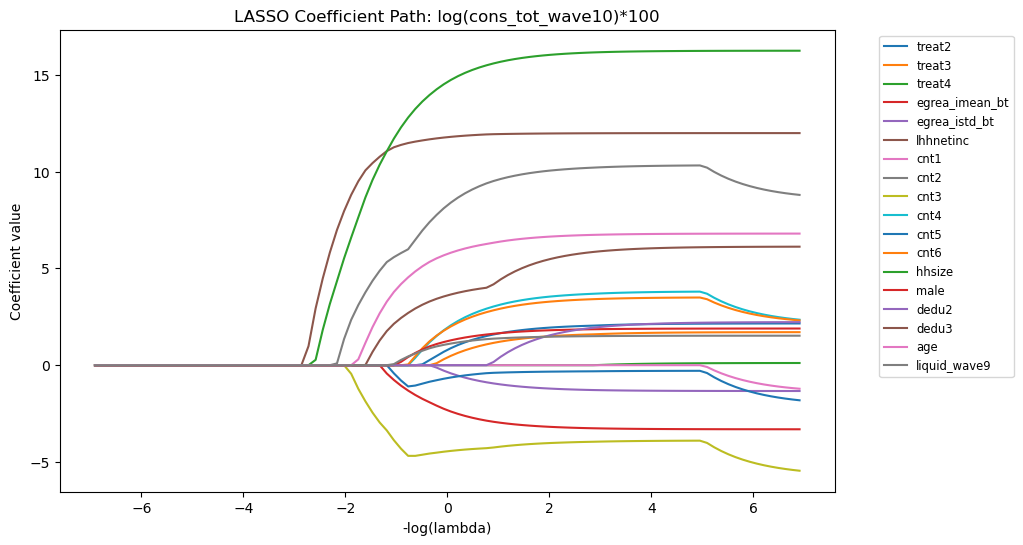

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.506e+03, tolerance: 1.151e+03
  model = cd_fast.enet_coordinate_descent(


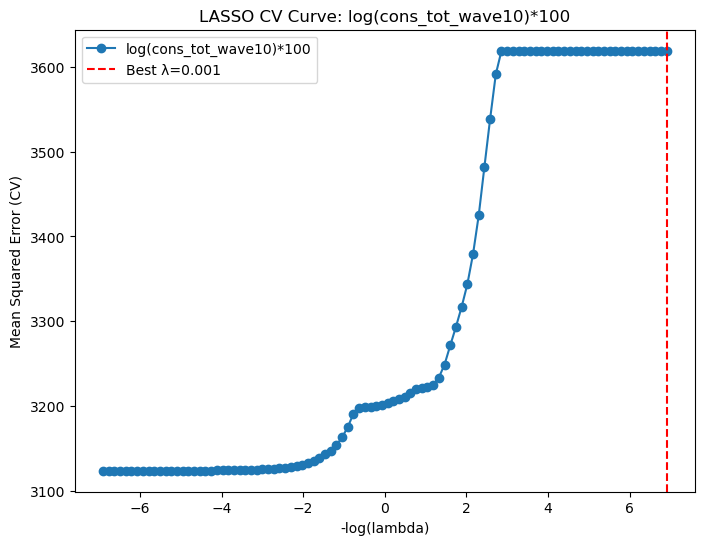

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.795e+03, tolerance: 1.243e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.796e+03, tolerance: 1.243e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.797e+03, tolerance: 

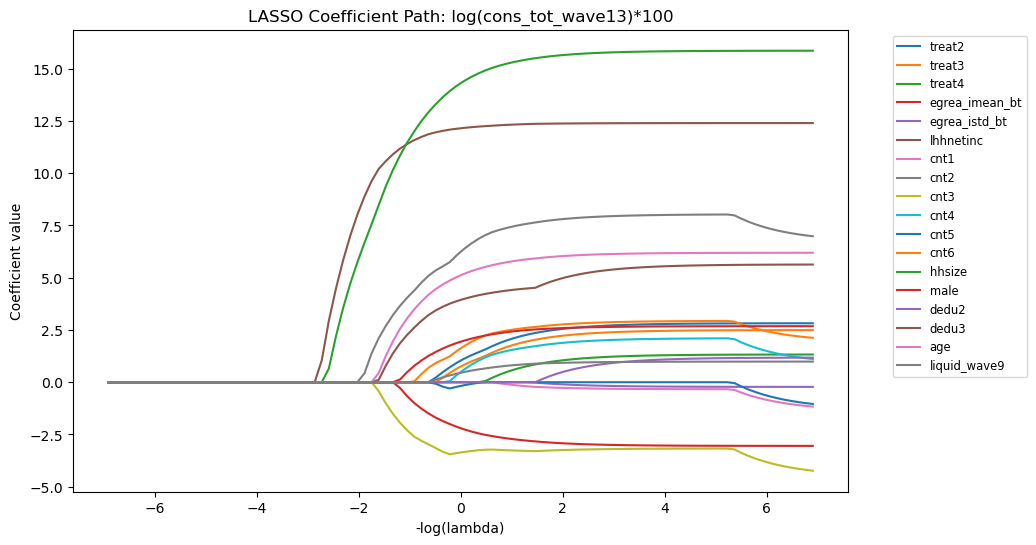

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.795e+03, tolerance: 1.243e+03
  model = cd_fast.enet_coordinate_descent(


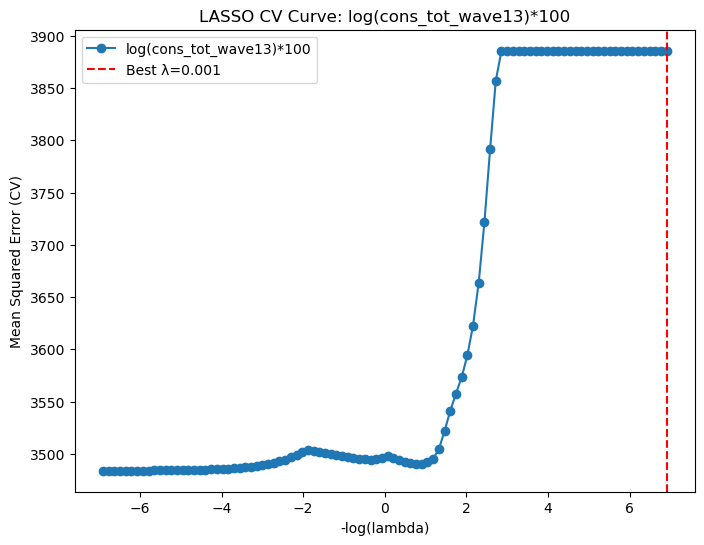

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

# Load the subset dataset
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert boolean to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only rows with positive consumption
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out observations with outcome > 10,000
df_filtered = df[(df["cons_tot_wave10"] <= 10000) & (df["cons_tot_wave13"] <= 10000)]

# Define predictors (drop treat1 so it's the baseline)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "cons_tot_wave13", "treat1"]]

# Prepare dependent variables (log * 100)
y1 = 100 * np.log(df_filtered["cons_tot_wave10"].astype(float))
y2 = 100 * np.log(df_filtered["cons_tot_wave13"].astype(float))

X_filtered = df_filtered[predictors].astype(float)

# Standardize predictors but keep column names
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_filtered), columns=X_filtered.columns)

# LASSO settings
alphas = np.logspace(-3, 3, 100)

def lasso_path_and_cv(X, y, label):
    # LASSO coefficient paths
    coefs = []
    for a in alphas:
        lasso = Lasso(alpha=a, max_iter=10000)
        lasso.fit(X, y)
        coefs.append(lasso.coef_)
    coefs = np.array(coefs)

    # Plot coefficient path
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(X.columns):
        plt.plot(-np.log(alphas), coefs[:, i], label=col)
    plt.xlabel("-log(lambda)")
    plt.ylabel("Coefficient value")
    plt.title(f"LASSO Coefficient Path: {label}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
    plt.show()

    # LassoCV
    lassocv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
    lassocv.fit(X, y)

    # Plot CV curve
    mse_mean = np.mean(lassocv.mse_path_, axis=1)  # average across folds
    plt.figure(figsize=(8, 6))
    plt.plot(-np.log(alphas), mse_mean, marker="o", label=f"{label}")
    plt.axvline(-np.log(lassocv.alpha_), linestyle="--", color="red", label=f"Best λ={lassocv.alpha_:.3f}")
    plt.xlabel("-log(lambda)")
    plt.ylabel("Mean Squared Error (CV)")
    plt.title(f"LASSO CV Curve: {label}")
    plt.legend()
    plt.show()

# Run for both outcomes
lasso_path_and_cv(X_scaled, y1, "log(cons_tot_wave10)*100")
lasso_path_and_cv(X_scaled, y2, "log(cons_tot_wave13)*100")


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\3017512489.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+06, tolerance: 5.113e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+06, tolerance: 5.113e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sk

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+06, tolerance: 5.113e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+06, tolerance: 5.113e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+06, tolerance: 

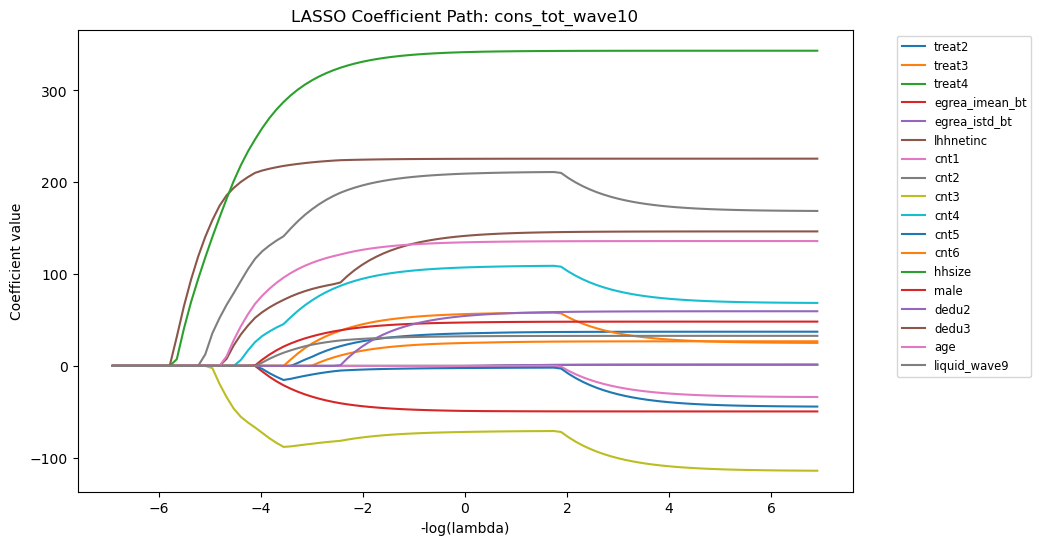

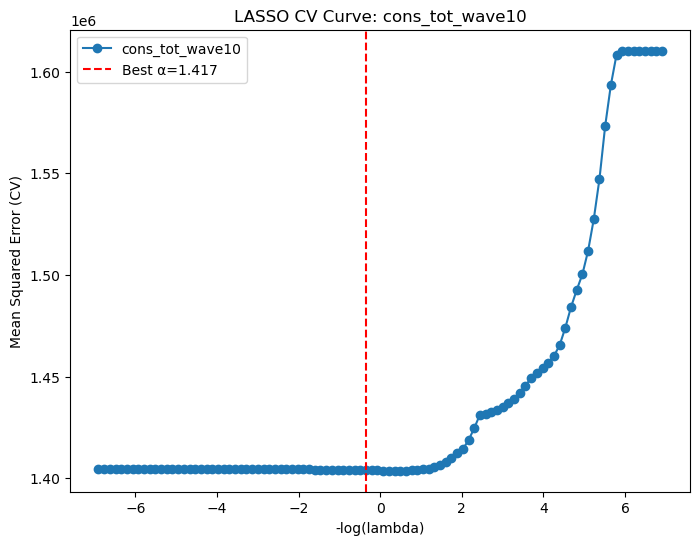

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+06, tolerance: 5.323e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+06, tolerance: 5.323e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+06, tolerance: 

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+06, tolerance: 5.323e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+06, tolerance: 5.323e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+06, tolerance: 

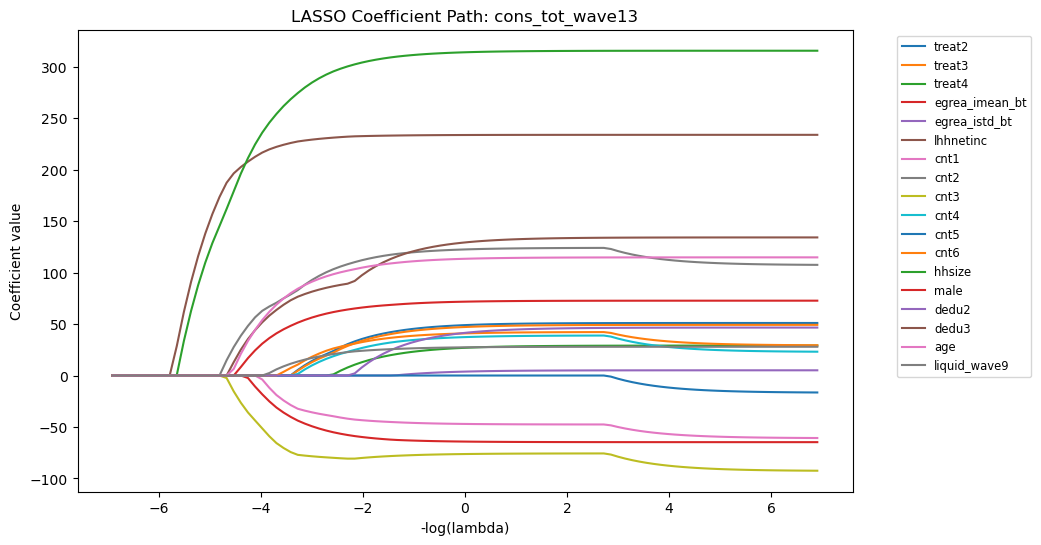

C:\Users\Zach\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+06, tolerance: 5.323e+05
  model = cd_fast.enet_coordinate_descent(


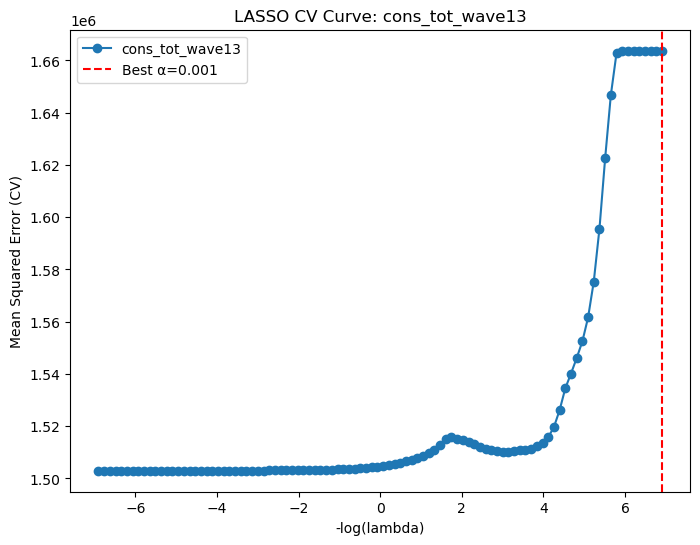

   Model          Outcome    Min CV MSE  Best Alpha
0  LASSO  cons_tot_wave10  1.403705e+06    1.417474
1  LASSO  cons_tot_wave13  1.502960e+06    0.001000


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

# ========================
# 1️⃣ Load and preprocess
# ========================
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert boolean to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only rows with positive consumption
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5 if it exists
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extremely high consumption
df_filtered = df[(df["cons_tot_wave10"] <= 10000) & (df["cons_tot_wave13"] <= 10000)]

# Define predictors (drop treat1 so it's baseline)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "cons_tot_wave13", "treat1"]]

# Dependent variables (raw consumption)
y_dict = {
    "cons_tot_wave10": df_filtered["cons_tot_wave10"].astype(float),
    "cons_tot_wave13": df_filtered["cons_tot_wave13"].astype(float)
}

# Standardize predictors
X_filtered = df_filtered[predictors].astype(float)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_filtered), columns=X_filtered.columns)

# LASSO alpha grid
alphas = np.logspace(-3, 3, 100)

# ========================
# 2️⃣ LASSO function
# ========================
def lasso_path_and_cv_summary(X, y_dict, alphas):
    summary = []

    for label, y in y_dict.items():
        # LASSO coefficient paths
        coefs = []
        for a in alphas:
            lasso = Lasso(alpha=a, max_iter=10000)
            lasso.fit(X, y)
            coefs.append(lasso.coef_)
        coefs = np.array(coefs)

        # Plot coefficient paths
        plt.figure(figsize=(10, 6))
        for i, col in enumerate(X.columns):
            plt.plot(-np.log(alphas), coefs[:, i], label=col)
        plt.xlabel("-log(lambda)")
        plt.ylabel("Coefficient value")
        plt.title(f"LASSO Coefficient Path: {label}")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
        plt.show()

        # LASSO CV
        lassocv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
        lassocv.fit(X, y)

        # CV MSE plot
        mse_mean = np.mean(lassocv.mse_path_, axis=1)
        plt.figure(figsize=(8, 6))
        plt.plot(-np.log(alphas), mse_mean, marker="o", label=label)
        plt.axvline(-np.log(lassocv.alpha_), linestyle="--", color="red", label=f"Best α={lassocv.alpha_:.3f}")
        plt.xlabel("-log(lambda)")
        plt.ylabel("Mean Squared Error (CV)")
        plt.title(f"LASSO CV Curve: {label}")
        plt.legend()
        plt.show()

        # Append summary
        summary.append({
            "Model": "LASSO",
            "Outcome": label,
            "Min CV MSE": mse_mean.min(),
            "Best Alpha": lassocv.alpha_
        })

    return pd.DataFrame(summary)

# ========================
# 3️⃣ Run LASSO
# ========================
lasso_summary_df = lasso_path_and_cv_summary(X_scaled, y_dict, alphas)
print(lasso_summary_df)


C:\Users\Zach\AppData\Local\Temp\ipykernel_48364\257923190.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


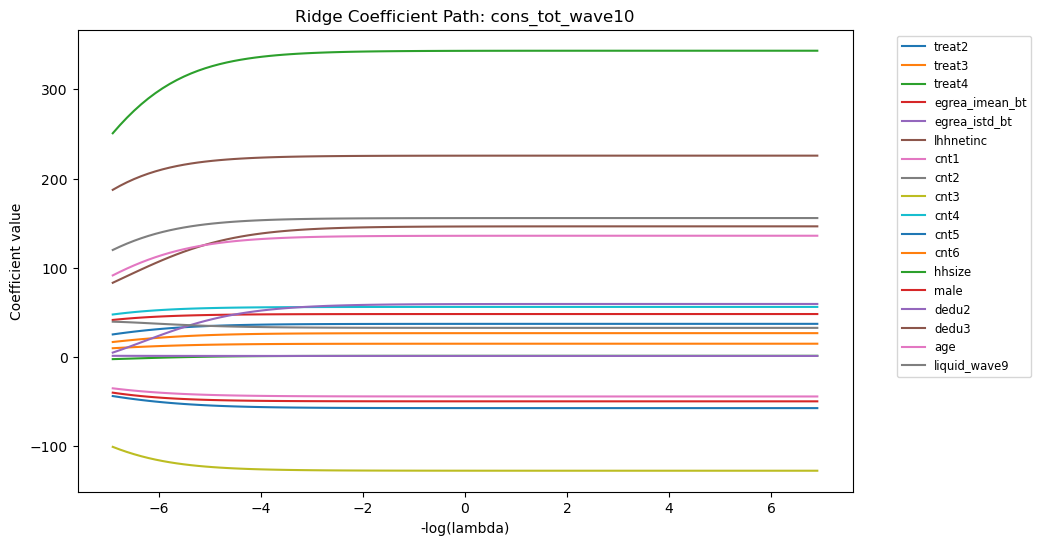

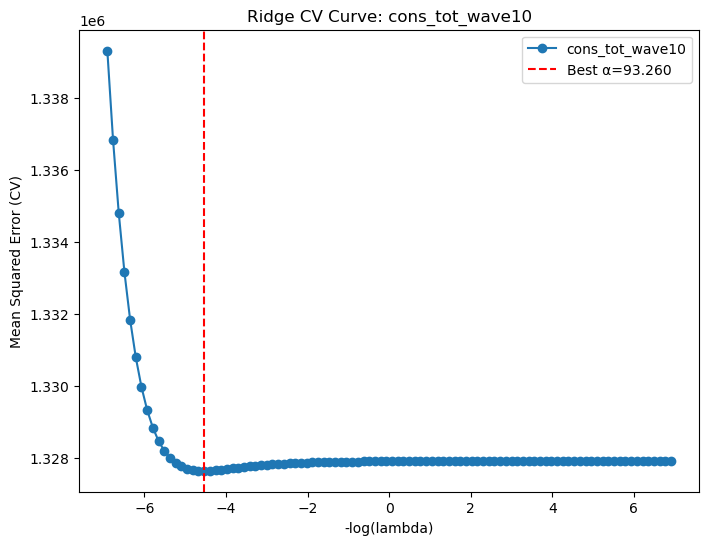

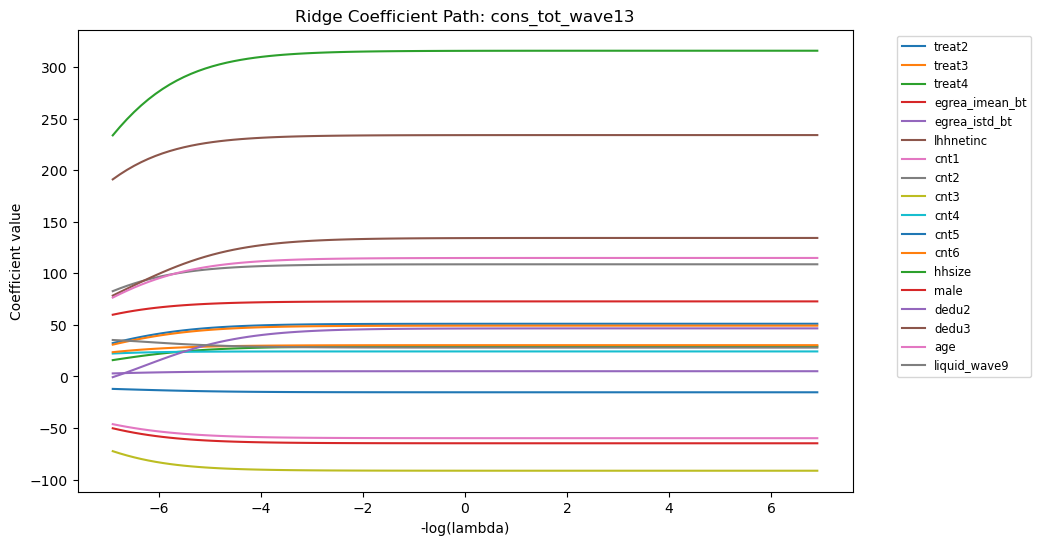

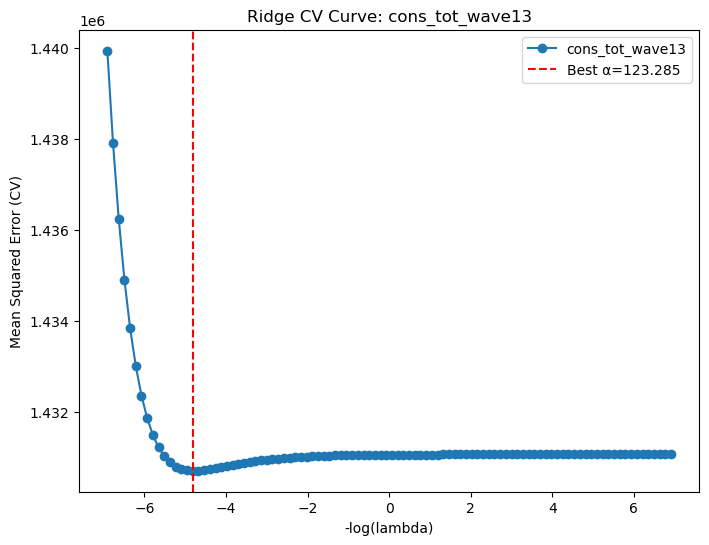

   Model          Outcome    Min CV MSE  Best Alpha
0  Ridge  cons_tot_wave10  1.327636e+06   93.260335
1  Ridge  cons_tot_wave13  1.430714e+06  123.284674


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler

# ========================
# 1️⃣ Load and preprocess
# ========================
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert boolean to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only rows with positive consumption
df = df[(df["cons_tot_wave10"] > 0) & (df["cons_tot_wave13"] > 0)].dropna()

# Drop treat5 if it exists
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extremely high consumption
df_filtered = df[(df["cons_tot_wave10"] <= 10000) & (df["cons_tot_wave13"] <= 10000)]

# Define predictors (drop treat1 so it's baseline)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "cons_tot_wave13", "treat1"]]

# Dependent variables (raw consumption)
y_dict = {
    "cons_tot_wave10": df_filtered["cons_tot_wave10"].astype(float),
    "cons_tot_wave13": df_filtered["cons_tot_wave13"].astype(float)
}

# Standardize predictors
X_filtered = df_filtered[predictors].astype(float)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_filtered), columns=X_filtered.columns)

# Ridge alpha grid
alphas = np.logspace(-3, 3, 100)

# ========================
# 2️⃣ Ridge function
# ========================
def ridge_path_and_cv_summary(X, y_dict, alphas):
    summary = []

    for label, y in y_dict.items():
        # Ridge coefficient paths
        coefs = []
        for a in alphas:
            ridge = Ridge(alpha=a, max_iter=10000)
            ridge.fit(X, y)
            coefs.append(ridge.coef_)
        coefs = np.array(coefs)

        # Plot coefficient paths
        plt.figure(figsize=(10, 6))
        for i, col in enumerate(X.columns):
            plt.plot(-np.log(alphas), coefs[:, i], label=col)
        plt.xlabel("-log(lambda)")
        plt.ylabel("Coefficient value")
        plt.title(f"Ridge Coefficient Path: {label}")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
        plt.show()

        # Ridge CV
        ridgecv = RidgeCV(alphas=alphas, store_cv_values=True)
        ridgecv.fit(X, y)

        # Compute CV MSE (average across folds)
        mse_mean = np.mean(ridgecv.cv_values_, axis=0)

        # CV MSE plot
        plt.figure(figsize=(8, 6))
        plt.plot(-np.log(alphas), mse_mean, marker="o", label=label)
        plt.axvline(-np.log(ridgecv.alpha_), linestyle="--", color="red", label=f"Best α={ridgecv.alpha_:.3f}")
        plt.xlabel("-log(lambda)")
        plt.ylabel("Mean Squared Error (CV)")
        plt.title(f"Ridge CV Curve: {label}")
        plt.legend()
        plt.show()

        # Append summary
        summary.append({
            "Model": "Ridge",
            "Outcome": label,
            "Min CV MSE": mse_mean.min(),
            "Best Alpha": ridgecv.alpha_
        })

    return pd.DataFrame(summary)

# ========================
# 3️⃣ Run Ridge
# ========================
ridge_summary_df = ridge_path_and_cv_summary(X_scaled, y_dict, alphas)
print(ridge_summary_df)
